In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('brazil.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
data.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


# For Bachelors who want to relocate.


In [5]:
bach = data[(data['rooms']==1) & (data['furniture']=='furnished') & (data['parking spaces']<=1) & (data['total (R$)']<=data['total (R$)'].mean())]
bach[['city','rooms','furniture','parking spaces','total (R$)']]

,city,rooms,furniture,parking spaces,total (R$)
9,Rio de Janeiro,1,furnished,0,2955
10,São Paulo,1,furnished,0,2747
13,São Paulo,1,furnished,1,5268
21,Belo Horizonte,1,furnished,1,3368
26,São Paulo,1,furnished,1,3639
...,...,...,...,...,...
10604,Rio de Janeiro,1,furnished,0,3033
10623,Porto Alegre,1,furnished,1,2633
10632,Porto Alegre,1,furnished,0,1476
10654,Rio de Janeiro,1,furnished,0,2945


In [83]:
bach_1 = pd.pivot_table(data=bach, index=bach['city'], values=['area'], aggfunc='mean')
bach_1

,area
city,
Belo Horizonte,34.441860
Campinas,50.085106
Porto Alegre,44.675214
Rio de Janeiro,39.275000
São Paulo,37.497449


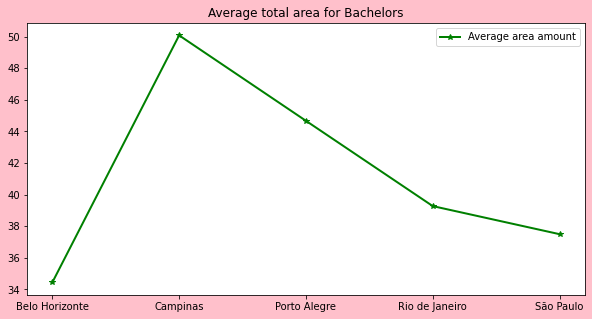

In [102]:
plt.figure(figsize=(10,5), facecolor='pink', frameon= True)
plt.title('Average total area for Bachelors')
plt.plot(bach_1, color='g', linewidth=2, label='Average area amount', marker='*')
plt.legend()
plt.show()

In [103]:
bach_2 = pd.pivot_table(data=bach, index=bach['city'], values=['total (R$)'], aggfunc='mean')
bach_2

,total (R$)
city,
Belo Horizonte,2019.372093
Campinas,2381.191489
Porto Alegre,2122.632479
Rio de Janeiro,2813.183333
São Paulo,3377.224490


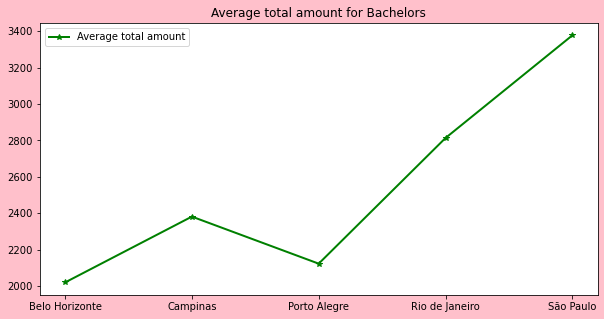

In [104]:
plt.figure(figsize=(10,5), facecolor='pink', frameon= True)
plt.title('Average total amount for Bachelors')
plt.plot(bach_2, color='g', linewidth=2, label='Average total amount', marker='*')
plt.legend()
plt.show()

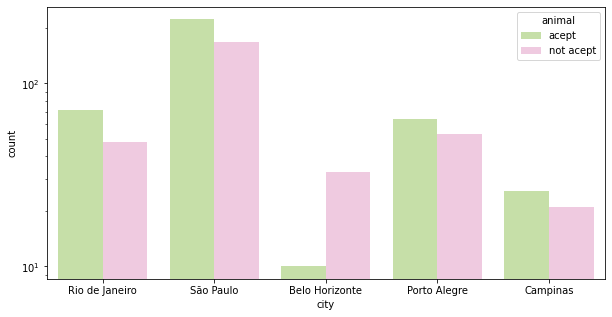

In [99]:
plt.figure(figsize=(10,5))
sb.countplot(data=bach, x='city', hue='animal', palette='PiYG_r')
plt.yscale('log')
plt.show()

# for mide sized families - family of 6  

In [68]:
fam = data[(data['rooms']>=3) & (data['rooms']<=5) & (data['bathroom']>=3) & (data['bathroom']<=5) & (data['parking spaces']>=3) & (data['parking spaces']<=5)]
fam

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
34,São Paulo,350,4,4,3,8,acept,not furnished,2100,4000,500,51,6651
55,São Paulo,210,4,5,4,4,not acept,not furnished,1650,9000,772,115,11540
59,São Paulo,194,3,4,3,0,acept,not furnished,0,4000,70,61,4131
65,Campinas,300,4,4,3,2,acept,not furnished,2300,6000,417,77,8794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10636,São Paulo,250,4,3,3,2,acept,not furnished,3600,2430,1167,31,7228
10669,São Paulo,340,4,5,3,15,not acept,furnished,3519,12000,1287,153,16960
10680,São Paulo,156,4,4,3,1,acept,furnished,2000,2200,750,28,4978
10681,São Paulo,230,3,5,3,3,not acept,not furnished,3800,11000,1100,140,16040


In [38]:
fam_piv = pd.pivot_table(data=fam, index='city', values='area', aggfunc='mean')
fam_piv

,area
city,
Belo Horizonte,493.951220
Campinas,356.046296
Porto Alegre,339.907895
Rio de Janeiro,323.823529
São Paulo,323.068388


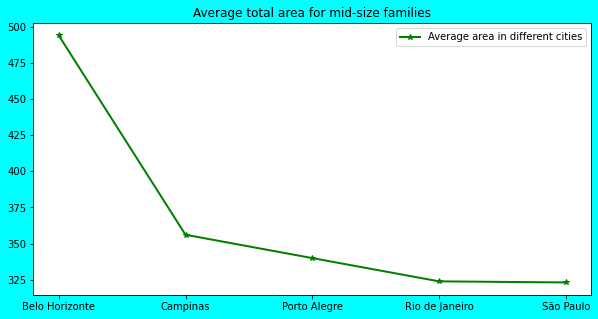

In [105]:
plt.figure(figsize=(10,5), facecolor='cyan')
plt.title('Average total area for mid-size families')
plt.plot(fam_piv, color='g', linewidth=2, label='Average area in different cities', marker='*')
plt.legend()
plt.show()

In [72]:
fam_piv1 = pd.pivot_table(data=fam, index='city', values='total (R$)', aggfunc='mean')
fam_piv1

,total (R$)
city,
Belo Horizonte,8838.647059
Campinas,7655.436620
Porto Alegre,8018.050847
Rio de Janeiro,10719.714286
São Paulo,10996.566176


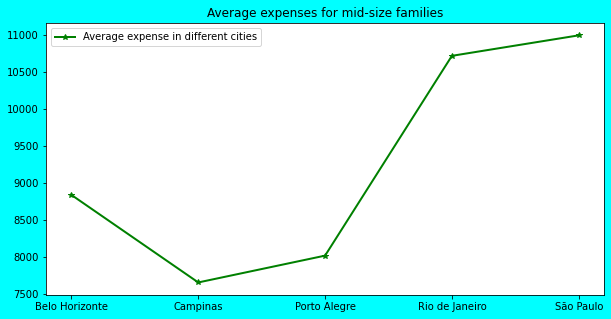

In [106]:
plt.figure(figsize=(10,5), facecolor='cyan')
plt.title('Average expenses for mid-size families')
plt.plot(fam_piv1, color='g', linewidth=2, label='Average expense in different cities', marker='*')
plt.legend()
plt.show()

In [54]:
# for pet friendly mid size families

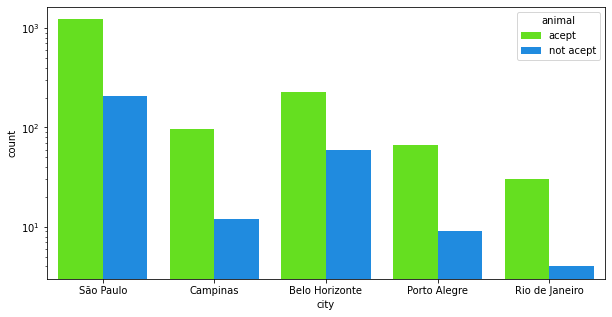

In [60]:
plt.figure(figsize=(10,5))
sb.countplot(data=fam, x='city', hue='animal', palette='gist_rainbow')
plt.yscale('log')
plt.show()

# large-size family

In [65]:
data['parking spaces'].unique()

array([ 1,  0,  7,  4,  2,  6,  3,  8,  5, 10, 12], dtype=int64)

In [69]:
fam2 = data[(data['rooms']>=6)  & (data['bathroom']>=6)  & (data['parking spaces']>=6)]
fam2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
277,São Paulo,360,7,6,6,0,acept,not furnished,0,5270,245,80,5595
570,Belo Horizonte,680,7,6,8,0,acept,not furnished,0,8000,428,132,8560
654,São Paulo,1600,6,6,6,0,acept,furnished,0,7600,1834,115,9549
752,Belo Horizonte,341,10,6,7,0,acept,not furnished,0,5500,459,91,6050
1532,São Paulo,800,7,7,8,0,acept,not furnished,0,9000,3000,136,12140
2414,São Paulo,500,7,7,8,0,not acept,furnished,0,9000,1667,136,10800
2511,São Paulo,700,6,8,8,0,acept,furnished,0,14000,1020,211,15230
3077,São Paulo,580,6,6,6,0,acept,not furnished,0,6960,2084,105,9149
3303,São Paulo,370,7,6,8,0,acept,not furnished,0,10000,1875,151,12030
3647,Belo Horizonte,682,6,7,6,0,acept,not furnished,0,5500,428,91,6019


In [70]:
fam2_piv = pd.pivot_table(data=fam2, index='city', values='area', aggfunc='mean')
fam2_piv

,area
city,
Belo Horizonte,735.428571
Campinas,560.000000
Porto Alegre,215.000000
São Paulo,617.000000


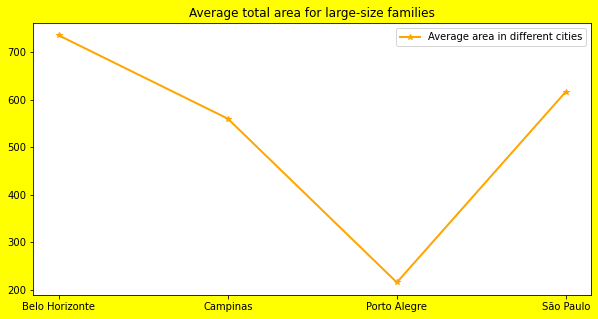

In [107]:
plt.figure(figsize=(10,5), facecolor='yellow')
plt.title('Average total area for large-size families')
plt.plot(fam2_piv, color='orange', linewidth=2, label='Average area in different cities', marker='*')
plt.legend()
plt.show()

In [76]:
fam2_piv1 = pd.pivot_table(data=fam2, index='city', values='total (R$)', aggfunc='mean')
fam2_piv1

,total (R$)
city,
Belo Horizonte,10105.000000
Campinas,10050.000000
Porto Alegre,5198.000000
São Paulo,10175.692308


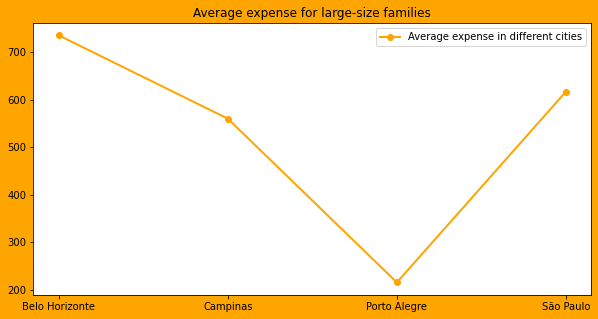

In [81]:
plt.figure(figsize=(10,5), facecolor='orange')
plt.title('Average expense for large-size families')
plt.plot(fam2_piv, color='orange', linewidth=2, label='Average expense in different cities', marker='o')
plt.legend()
plt.show()

In [85]:
# for pet friendly 

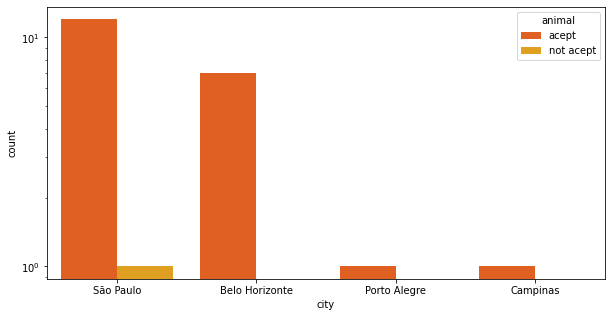

In [93]:
plt.figure(figsize=(10,5))
sb.countplot(data=fam2, x='city', hue='animal', palette='autumn')
plt.yscale('log')
plt.show()

# univariate analysis 

In [108]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


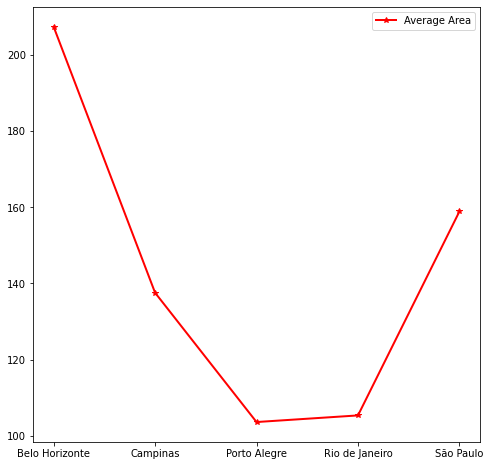

In [146]:
area = pd.pivot_table(data=data, index='city', values=['area'], aggfunc='mean')

plt.figure(figsize=(8,8))
plt.plot(area, marker='*', color='r', linewidth=2, label='Average Area')
plt.legend()
plt.show()

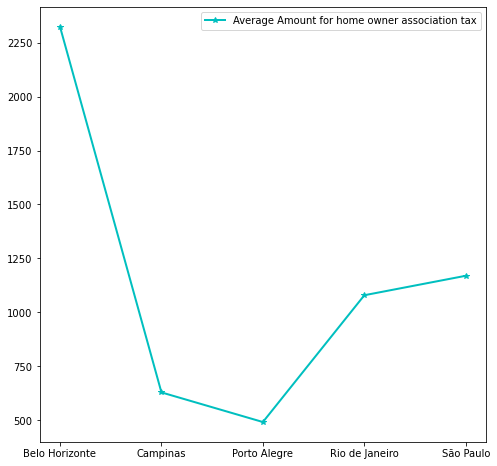

In [140]:
hoa = pd.pivot_table(data=data, index='city', values=['hoa (R$)'], aggfunc='mean')

plt.figure(figsize=(8,8))
plt.plot(hoa, marker='*', color='c', linewidth=2, label='Average Amount for home owner association tax')
plt.legend()
plt.show()

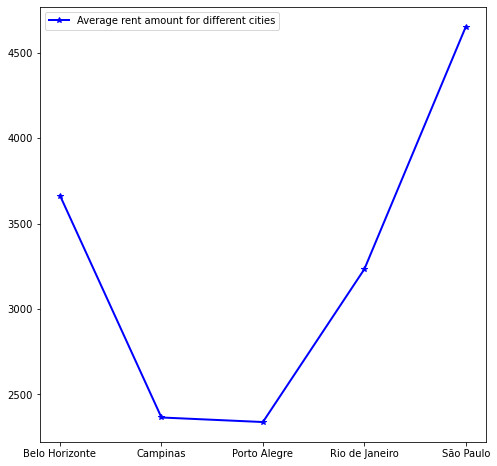

In [138]:
rent = pd.pivot_table(data=data, index='city', values=['rent amount (R$)'], aggfunc='mean')

plt.figure(figsize=(8,8))
plt.plot(rent, marker='*', color='b', linewidth=2, label='Average rent amount for different cities')
plt.legend()
plt.show()

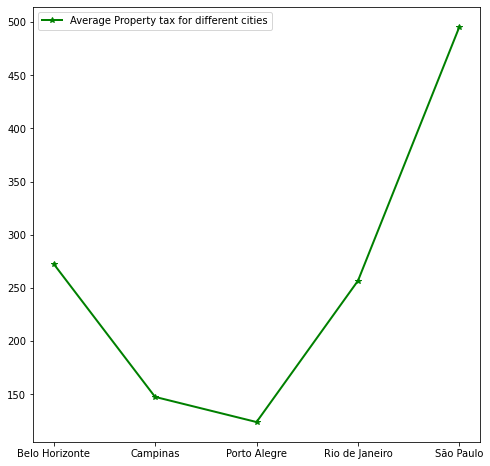

In [139]:
ptax = pd.pivot_table(data=data, index='city', values=['property tax (R$)'], aggfunc='mean')

plt.figure(figsize=(8,8))
plt.plot(ptax, marker='*', color='g', linewidth=2, label='Average Property tax for different cities')
plt.legend()
plt.show()

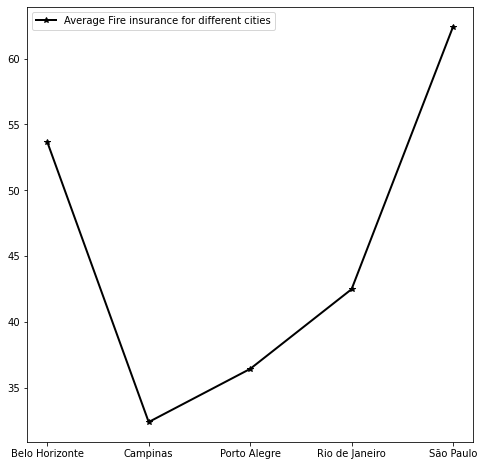

In [143]:
fire = pd.pivot_table(data=data, index='city', values=['fire insurance (R$)'], aggfunc='mean')

plt.figure(figsize=(8,8))
plt.plot(fire, marker='*', color='black', linewidth=2, label='Average Fire insurance for different cities')
plt.legend()
plt.show()

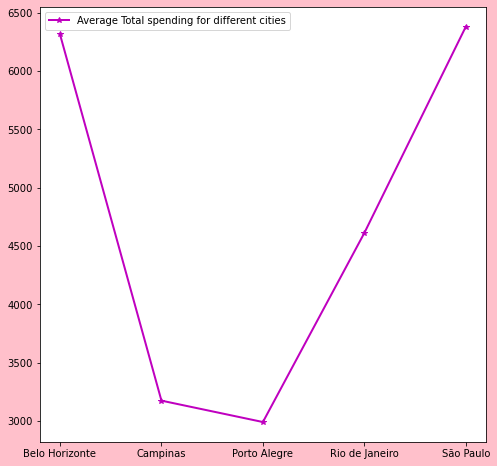

In [147]:
tot = pd.pivot_table(data=data, index='city', values=['total (R$)'], aggfunc='mean')

plt.figure(figsize=(8,8), facecolor='pink' )
plt.plot(tot, marker='*', color='m', linewidth=2, label='Average Total spending for different cities')
plt.legend()
plt.show()

In [178]:
data2 =  data.groupby(by = 'city')[['area','total (R$)','fire insurance (R$)','property tax (R$)','rent amount (R$)','hoa (R$)']].mean()

In [181]:
data2 = data2.reset_index()
data2.round(2)

,index,city,area,total (R$),fire insurance (R$),property tax (R$),rent amount (R$),hoa (R$)
0,0,Belo Horizonte,207.41,6315.24,53.68,272.78,3664.13,2324.20
1,1,Campinas,137.56,3173.28,32.39,147.66,2364.29,628.92
2,2,Porto Alegre,103.61,2989.78,36.43,124.02,2337.70,491.62
3,3,Rio de Janeiro,105.35,4611.68,42.48,256.85,3232.90,1079.43
4,4,São Paulo,158.90,6380.83,62.43,495.70,4652.79,1169.63


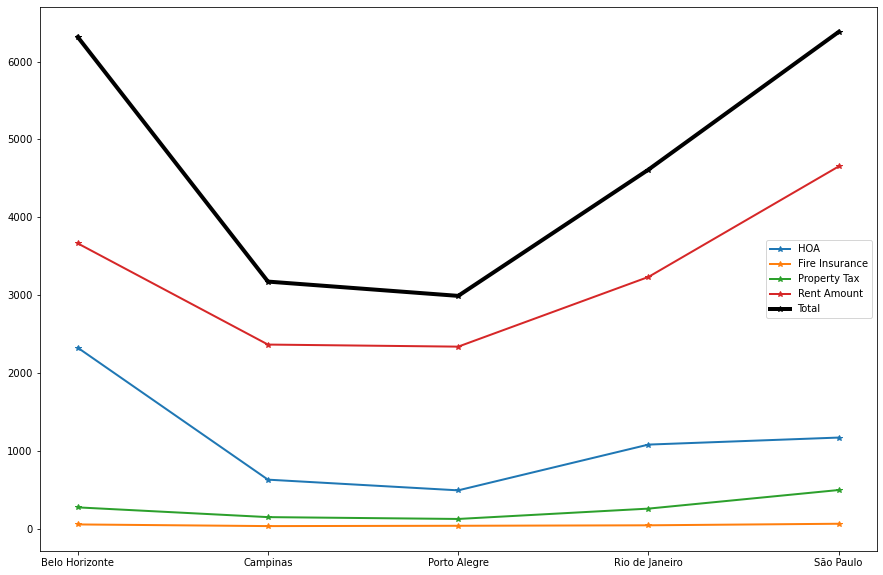

In [174]:
plt.figure(figsize=(15,10))
plt.plot(data2['city'], data2['hoa (R$)'], label = "HOA", linewidth = 2, marker='*')
plt.plot(data2['city'], data2['fire insurance (R$)'], label = "Fire Insurance", linewidth = 2, marker='*')
plt.plot(data2['city'], data2['property tax (R$)'], label = "Property Tax", linewidth = 2, marker='*')
plt.plot(data2['city'], data2['rent amount (R$)'], label = "Rent Amount", linewidth = 2, marker='*')
plt.plot(data2['city'], data2['total (R$)'],color='black', label = "Total", linewidth = 4, marker='*')
plt.legend()
plt.show()

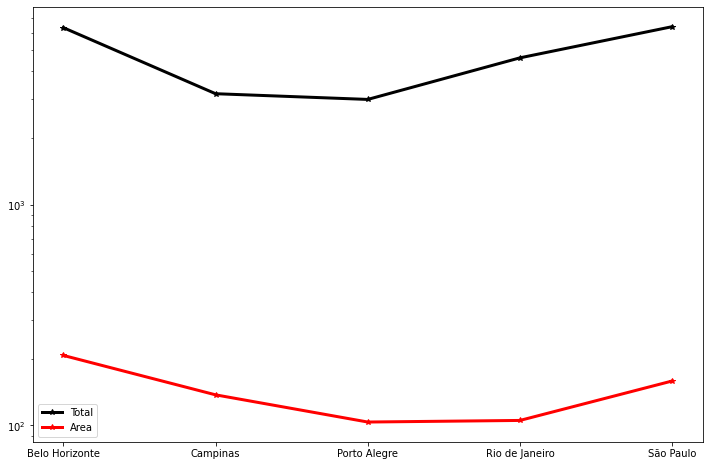

In [188]:
# relation between total area and total expenses
plt.figure(figsize=(12,8))
plt.plot(data2['city'], data2['total (R$)'],color='black', label = "Total", linewidth = 3, marker='*')
plt.plot(data2['city'], data2['area'],color='red', label = "Area", linewidth = 3, marker='*')
plt.yscale('log')
plt.legend()
plt.show()

In [189]:
data['area'].corr(data['total (R$)'])

0.0517994074535353

In [193]:
tab1 = pd.DataFrame()
tab1['city'] = data2['city']
tab1['area'] = data2['area']
tab1['total (R$)'] = data2['total (R$)']
tab1['Ratio'] =  data2['area'] / data2['total (R$)']
tab1.round(2)


,city,area,total (R$),Ratio
0,Belo Horizonte,207.41,6315.24,0.03
1,Campinas,137.56,3173.28,0.04
2,Porto Alegre,103.61,2989.78,0.03
3,Rio de Janeiro,105.35,4611.68,0.02
4,São Paulo,158.90,6380.83,0.02
